In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# County health rankings

In [2]:
#Data from https://www.walkscore.com/cities-and-neighborhoods
health = pd.read_excel('Data/2017CountyHealthRankingsData.xls',
              sheetname='Ranked Measure Data',
              skiprows=[0])

In [3]:
health.head()

,FIPS,State,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,% Fair/Poor,95% CI - Low.1,...,95% CI - High.20,Quartile.33,% Drive Alone - Black,% Drive Alone - Hispanic,% Drive Alone - White,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
0,1001,Alabama,Autauga,830.0,9158.2,8251.0,10065.3,1,17.878814,17.309716,...,89.272604,4,NaN,NaN,82.688642,21101,42.6,38.498437,46.701563,3
1,1003,Alabama,Baldwin,2573.0,7393.9,6947.3,7840.4,1,16.361973,15.930774,...,85.889448,2,84.812778,61.239620,85.255443,71535,37.7,35.278607,40.121393,3
2,1005,Alabama,Barbour,413.0,8573.1,7291.9,9854.3,1,25.020401,24.388756,...,85.631456,2,82.056719,NaN,NaN,7090,35.5,30.606183,40.393817,3
3,1007,Alabama,Bibb,407.0,11766.1,10033.8,13498.4,4,19.540231,18.909030,...,88.544332,2,NaN,NaN,88.356941,6778,46.5,39.207540,53.792460,4
4,1009,Alabama,Blount,906.0,9332.8,8429.8,10235.8,2,18.947608,18.348409,...,87.475791,2,NaN,73.117034,82.172461,18624,59.8,55.074426,64.525574,4


In [5]:
health.shape

(3136, 156)

(array([    3.,    45.,   187.,   586.,  1039.,   735.,   341.,   157.,
           38.,     5.]),
 array([  3.17805383,   4.35034691,   5.52263998,   6.69493306,
          7.86722613,   9.03951921,  10.21181228,  11.38410536,
         12.55639843,  13.72869151,  14.90098458]),
 <a list of 10 Patch objects>)

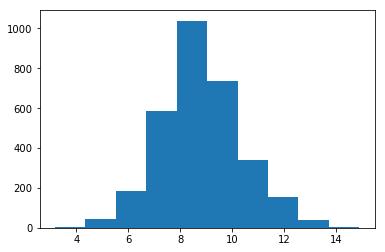

In [23]:
plt.hist(np.log(health['Population']))

(array([  34.,  295.,  615.,  718.,  662.,  447.,  263.,   87.,   13.,    2.]),
 array([  0.  ,   7.66,  15.32,  22.98,  30.64,  38.3 ,  45.96,  53.62,
         61.28,  68.94,  76.6 ]),
 <a list of 10 Patch objects>)

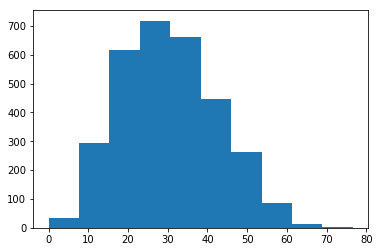

In [6]:
plt.hist(health['% Long Commute - Drives Alone'])

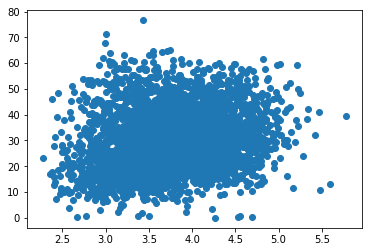

In [7]:
plt.scatter(health['Mentally Unhealthy Days'], health['% Long Commute - Drives Alone'])

In [8]:
from scipy.stats import pearsonr

In [9]:
pearsonr(health['Mentally Unhealthy Days'], health['% Long Commute - Drives Alone'])

(0.18994962038347549, 7.2982860609192542e-27)

In [64]:
health_sm = health[
    ['Mentally Unhealthy Days', 
     '% Long Commute - Drives Alone', 
     '% Unemployed',
     'Income Ratio',
     'Population',
     'County'
    ]
]
health_sm['Population'] = np.log(health_sm['Population'])
health_sm.columns = ['unhealthy', 'commute', 'unemployed', 'inequality', 'logpop', 'County']

/home/hudson/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


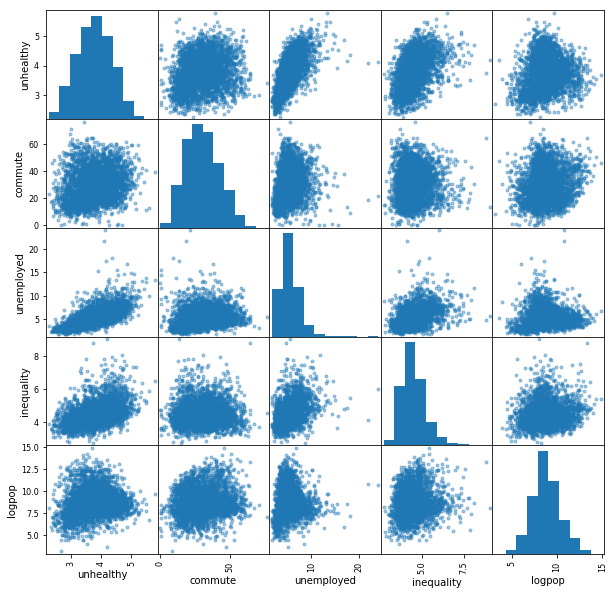

In [58]:
sc = pd.scatter_matrix(health_sm, alpha=.4, figsize=(10, 10))

In [87]:
import patsy
import statsmodels.api as sm

In [61]:
outcome, predictors = patsy.dmatrices('unhealthy ~ \
                                      commute + \
                                      unemployed + \
                                      inequality + \
                                      logpop',
                                          health_sm)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              unhealthy   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     758.6
Date:                Tue, 30 May 2017   Prob (F-statistic):               0.00
Time:                        15:09:14   Log-Likelihood:                -1624.7
No. Observations:                3134   AIC:                             3259.
Df Residuals:                    3129   BIC:                             3290.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7442      0.061     28.797      0.0

# Walk Score (Must run HTML section of Walk Score notebook to prepare data)

In [76]:
ws = pd.DataFrame.from_csv('Data/MostWalkable.csv').replace('--', np.nan)
ws[ws.columns[2:5]] = ws[ws.columns[2:5]].applymap(float)
ws.columns = ['City', 'State', 'walk', 'transit', 'bike', 'Population']

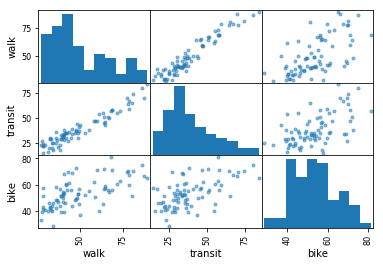

In [77]:
sc = pd.scatter_matrix(ws.dropna())

# Merge

In [80]:
merged = pd.merge(ws, health_sm, left_on='City', right_on='County')

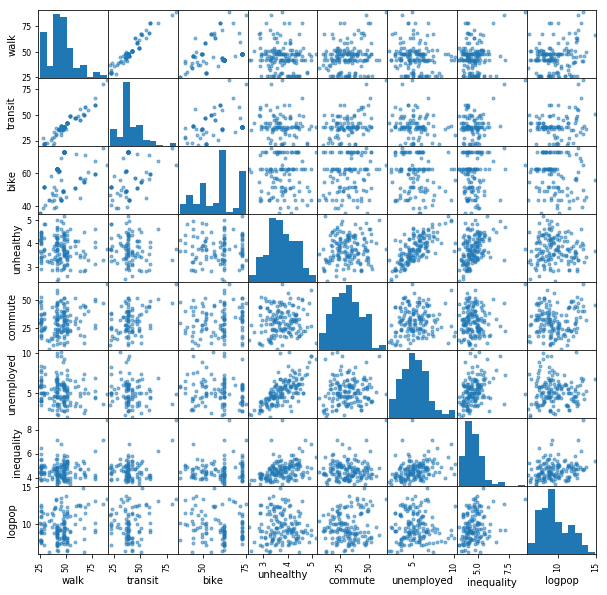

In [81]:
sc = pd.scatter_matrix(merged, figsize = (10,10))

In [84]:
merged.head()

,City,State,walk,transit,bike,Population,unhealthy,commute,unemployed,inequality,logpop,County
0,New York,NY,88.9,84.1,65.1,"8,175,133",3.746675,64.9,4.820956,8.834938,13.317649,New York
1,Los Angeles,CA,66.3,51.3,56.0,"3,792,621",3.695493,46.1,6.721462,5.417518,14.900985,Los Angeles
2,Houston,TX,47.8,36.8,49.3,"2,099,451",4.482943,27.9,6.179738,5.009293,10.188629,Houston
3,Houston,TX,47.8,36.8,49.3,"2,099,451",3.888774,24.1,5.804154,4.430791,10.615285,Houston
4,Houston,TX,47.8,36.8,49.3,"2,099,451",2.902965,28.0,3.846884,3.854433,8.279697,Houston


In [88]:
outcome, predictors = patsy.dmatrices('unhealthy ~ \
                                      commute + \
                                      unemployed + \
                                      inequality + \
                                      logpop + \
                                      walk + \
                                      transit + \
                                      bike' ,
                                          merged)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              unhealthy   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     16.01
Date:                Tue, 30 May 2017   Prob (F-statistic):           3.57e-12
Time:                        15:17:32   Log-Likelihood:                -26.352
No. Observations:                  75   AIC:                             68.70
Df Residuals:                      67   BIC:                             87.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2417      0.411      5.452      0.0